## Imports


In [126]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

from PIL import Image
import math

## Data


In [127]:
np_file1 = "data/lines1.npy"
np_file2 = "data/Cols1.npy"
np_file3 = "data/amplitude1.npy"

image_1 = cv2.imread("./images/lucy_paw_4bits.bmp", -1)
image_2 = cv2.imread("./images/lucy_paw_8bits.bmp", -1)
image_3 = cv2.imread("./images/image1.tif", -1)

lines = np.load(np_file1)
columns = np.load(np_file2)
amplitudes = np.load(np_file3)


## Sampling


In [128]:
def sampling(lines, columns, step):
    if len(lines) % step != 0:
        a = int(len(lines) / step) + 1
    else:
        a = int(len(lines) / step)

    if len(columns) % step != 0:
        b = int(len(columns) / step) + 1
    else:
        b = int(len(columns) / step)

    image = np.zeros((a, b))

    k = 0

    for line in range(0, len(lines), step):
        l = 0
        for column in range(0, len(columns), step):
            image[k, l] = amplitudes[line, column]
            l += 1
        k += 1

    return image


## Sampling vis

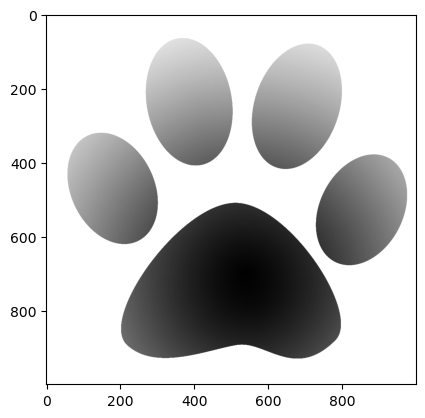

In [129]:
plt.imshow(sampling(lines,columns, 1), cmap="gray")

## Quantification


In [130]:
def quantification(nBits, amplitudes):
    l = pow(2, nBits)
    colors = [*range(l)]

    old_min = np.amin(amplitudes)
    old_max = np.amax(amplitudes)

    new_min = min(colors)
    new_max = max(colors)

    quantified = np.rint(
        (amplitudes - old_min) * (new_max - new_min) / (old_max / old_min)
    )

    return quantified


## Quantification vis

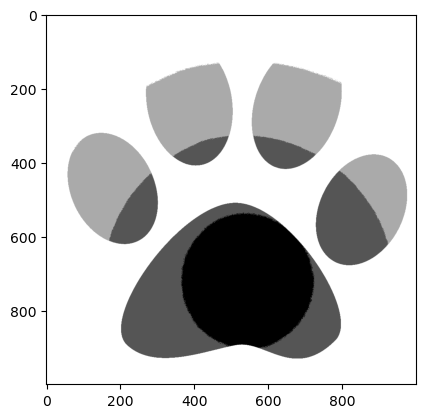

In [131]:
plt.imshow(quantification(6,amplitudes), cmap="gray")

## Image addition


In [132]:
def check_size(image_1, image_2):
    min_lines = min(image_1.shape[0], image_2.shape[0])
    min_columns = min(image_1.shape[1], image_2.shape[1])

    image_1 = cv2.resize(image_1, dsize=(min_lines, min_columns))
    image_2 = cv2.resize(image_2, dsize=(min_lines, min_columns))

    return image_1, image_2


In [133]:
def add_images_basic(image_1, image_2):
    image_1, image_2 = check_size(image_1, image_2)
    added = np.zeros((image_1.shape[0], image_1.shape[0]))
    for i in range(image_1.shape[0]):
        for j in range(image_1.shape[0]):
            if image_1[i, j] == 255:
                value = image_2[i, j]
            else:
                if image_2[i, j] == 255:
                    value = image_1[i, j]
                else:
                    value = image_1[i, j] + image_2[i, j]
            if value > 255:
                value = 255
            added[i, j] = value

    return added


/tmp/ipykernel_3266/100756947.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  value = image_1[i, j] + image_2[i, j]


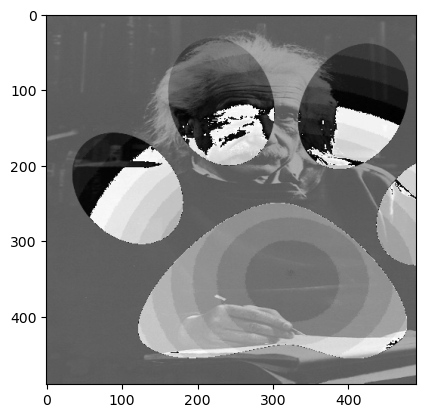

In [134]:
plt.imshow(add_images_basic(image_1, image_3), cmap="gray")

In [135]:
def add_images(image_1, image_2):
    image_1, image_2 = check_size(image_1, image_2)
    added = image_1 + image_2

    return added


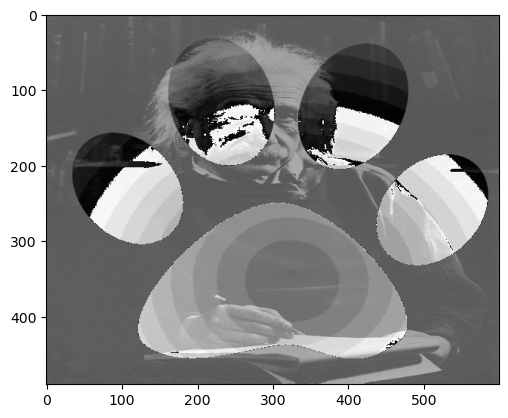

In [136]:
plt.imshow(add_images(image_1, image_3), cmap="gray")

In [137]:
def add_images_modulo(image_1, image_2):
    image_1, image_2 = check_size(image_1, image_2)
    added = image_1 + image_2
    added = added % 256

    return added


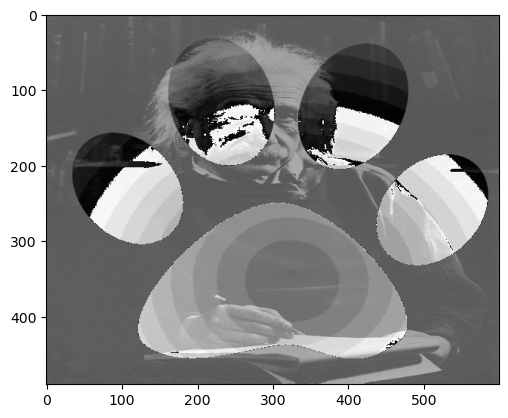

In [138]:
plt.imshow(add_images_modulo(image_1, image_3), cmap="gray")

In [139]:
def addimages_cv(image_1, image_2):
    image_1, image_2 = check_size(image_1, image_2)
    image_1 = image_1.astype(np.int16)
    image_2 = image_2.astype(np.int16)
    added = cv2.add(image_1, image_2)

    return added


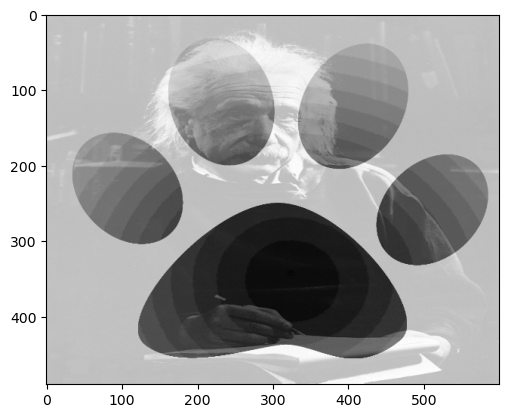

In [140]:
plt.imshow(addimages_cv(image_1, image_3), cmap="gray")

In [141]:
def add_images_cv_weight(image_1, image_2):
    image_1, image_2 = check_size(image_1, image_2)
    image_1 = image_1.astype(np.int8)
    image_2 = image_2.astype(np.int8)
    added = cv2.addWeighted(image_1, 0.5, image_2, 0.4, 0)

    return added


In [142]:
def add_images_np():
    def addimagesCV(image_1, image_2):
        image_1, image_2 = check_size(image_1, image_2)
        added = np.add(image_1, image_2)

        return added


## Image negative


In [143]:
def negative_images(image):
    negative_image = np.zeros((image.shape[0], image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            negative_image[i, j] = max(0, 255 - image[i, j])
    return negative_image


## Negative Vis

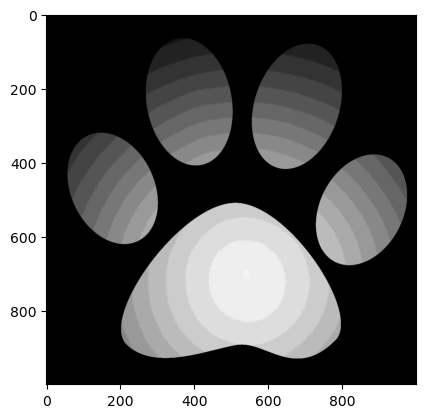

In [144]:
plt.imshow(negative_images(image_1), cmap="gray")

## Noise

In [145]:
Fsize = 3
sigma = 1

def sp_noise(image, ratio):
    output = np.zeros(image.shape, np.uint8)
    threshhold = 1 - ratio
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rand = random.random()
            if rand < ratio:
                output[i][j] = 0
            elif rand > threshhold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# A faire 

In [146]:
pil_image_1 = Image.open("./images/lucy_paw_4bits.bmp")
pil_image_2 = Image.open("./images/lucy_paw_8bits.bmp")


def definition(image):
    print(image.shape)

def resolution(image):
    print(math.log2(np.asarray(image).max())/math.log2(2))

resolution(pil_image_1)

3.9068905956085187
